# Task 1- Prediction using Supervised ML

## Name- Valerie D'Souza

### Problem Statement: What will be the predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#Importing required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Data

data= pd.read_csv("http://bit.ly/w-data")
print("Data successfully imported!")
data

Data successfully imported!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the data

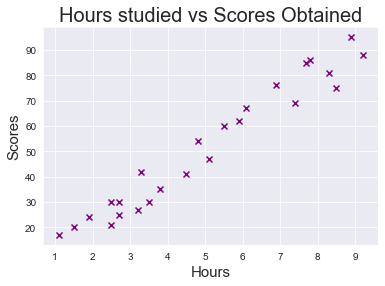

In [6]:
sns.set_style("darkgrid")
plt.scatter(data.Hours,data.Scores, marker='x',color='purple')
plt.title('Hours studied vs Scores Obtained', fontsize='20')
plt.xlabel('Hours', fontsize='15')
plt.ylabel('Scores',fontsize='15')
plt.show()


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the data

In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Training the Model

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
print('Model Trained.')

Model Trained.


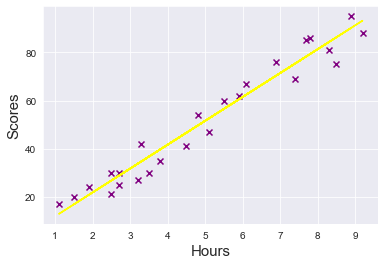

In [14]:
line=lin_reg.coef_*x + lin_reg.intercept_
plt.scatter(data.Hours,data.Scores, marker='x',color='purple')
plt.plot(x,line,color='yellow')
plt.xlabel('Hours', fontsize='15')
plt.ylabel('Scores',fontsize='15')
plt.show()

### Prediction

In [15]:
y_pred= lin_reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
df= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the Model

In [17]:
from sklearn import metrics
mae= metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error: {}'.format(mae))

Mean Absolute Error: 4.183859899002975


### Solution for given problem.
 What will be the predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hrs = 9.25
prescore= lin_reg.predict([[hrs]])
print("No. of Hours: {}".format(hrs))
print("Predicted Score = {}".format(prescore[0]))

No. of Hours: 9.25
Predicted Score = 93.69173248737538
